## UAS MACHINE LEARNING

## NAMA  : Wira Dwi Susanto
## NIM   : 17.01.53.0053
## Kelas : A1

# CLUSTERING

# Persentase Penduduk Daerah Perkotaan menurut Provinsi, 2010-2035
# https://www.bps.go.id/statictable/2014/02/18/1276/persentase-penduduk-daerah-perkotaan-hasil-proyeksi-penduduk-menurut-provinsi-2015---2035.html

In [93]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Pertama, lakukan *import* *library*/kebutuhan yang diperlukan di Python 

In [94]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [96]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Untuk *import* *library* yang diperlukan di Python

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Import datasetnya menggunakan fungsi pandas pd.read_excel()

In [98]:
import_datanya = pd.read_excel("Persentase Penduduk Daerah Perkotaan.xls")

# Coba kita tampilkan data dari dataset 5 paling teratas

In [99]:
import_datanya.head(5)

,Provinsi,2010,2015,2020,2025,2030,2035
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aceh,28.1,30.5,33.2,36.2,39.5,43.2
2,Sumatera Utara,49.2,52.6,56.3,60.1,64.1,68.1
3,Sumatera Barat,38.7,44.2,49.6,54.6,59.4,63.8
4,Riau,39.2,39.6,40.1,40.7,41.2,41.8


# Coba menampilkan informasi datatype pada dataset, terdiri dari object dan float64

In [100]:
import_datanya.info

<bound method DataFrame.info of                      Provinsi   2010   2015   2020   2025   2030   2035
0                         NaN    NaN    NaN    NaN    NaN    NaN    NaN
1                        Aceh   28.1   30.5   33.2   36.2   39.5   43.2
2              Sumatera Utara   49.2   52.6   56.3   60.1   64.1   68.1
3              Sumatera Barat   38.7   44.2   49.6   54.6   59.4   63.8
4                        Riau   39.2   39.6   40.1   40.7   41.2   41.8
5                       Jambi   30.7   32.0   33.3   34.8   36.5   38.2
6            Sumatera Selatan   35.8   36.5   37.3   38.2   39.1   40.1
7                    Bengkulu   31.0   31.7   32.6   33.5   34.5   35.6
8                     Lampung   25.7   28.3   31.3   34.6   38.3   42.4
9   Kepulauan Bangka Belitung   49.2   52.5   56.0   59.7   63.5   67.4
10             Kepulauan Riau   82.8   83.0   83.3   83.8   84.5   85.3
11                DKI Jakarta  100.0  100.0  100.0  100.0  100.0  100.0
12                 Jawa Barat   

# Perlu dilakukan drop pada atribut dataset yang memiliki value NaN (tidak mempunyai nilai). Untuk melakukannya, gunakan fungsi dropna()

In [101]:
import_datanya.dropna()

,Provinsi,2010,2015,2020,2025,2030,2035
1,Aceh,28.1,30.5,33.2,36.2,39.5,43.2
2,Sumatera Utara,49.2,52.6,56.3,60.1,64.1,68.1
3,Sumatera Barat,38.7,44.2,49.6,54.6,59.4,63.8
4,Riau,39.2,39.6,40.1,40.7,41.2,41.8
5,Jambi,30.7,32.0,33.3,34.8,36.5,38.2
6,Sumatera Selatan,35.8,36.5,37.3,38.2,39.1,40.1
7,Bengkulu,31.0,31.7,32.6,33.5,34.5,35.6
8,Lampung,25.7,28.3,31.3,34.6,38.3,42.4
9,Kepulauan Bangka Belitung,49.2,52.5,56.0,59.7,63.5,67.4
10,Kepulauan Riau,82.8,83.0,83.3,83.8,84.5,85.3


# Gunakan fungsi shape untuk menampilkan banyaknya elemen di setiap dimensi array

In [102]:
import_datanya.shape

(35, 7)

# Hapus kolom variable yang tidak diperlukan

In [103]:
data = import_datanya.drop(['Provinsi'], axis = 1)
data.head()

,2010,2015,2020,2025,2030,2035
0,NaN,NaN,NaN,NaN,NaN,NaN
1,28.1,30.5,33.2,36.2,39.5,43.2
2,49.2,52.6,56.3,60.1,64.1,68.1
3,38.7,44.2,49.6,54.6,59.4,63.8
4,39.2,39.6,40.1,40.7,41.2,41.8


# Lakukan cleansing pada data yang masih mempunyai value NaN (untuk memastikan). Kita akan menghapusnya.

In [104]:
data.dropna(how='any') 

,2010,2015,2020,2025,2030,2035
1,28.1,30.5,33.2,36.2,39.5,43.2
2,49.2,52.6,56.3,60.1,64.1,68.1
3,38.7,44.2,49.6,54.6,59.4,63.8
4,39.2,39.6,40.1,40.7,41.2,41.8
5,30.7,32.0,33.3,34.8,36.5,38.2
6,35.8,36.5,37.3,38.2,39.1,40.1
7,31.0,31.7,32.6,33.5,34.5,35.6
8,25.7,28.3,31.3,34.6,38.3,42.4
9,49.2,52.5,56.0,59.7,63.5,67.4
10,82.8,83.0,83.3,83.8,84.5,85.3


In [105]:
X = pd.DataFrame(data.dropna(how='any'))
X.head()

,2010,2015,2020,2025,2030,2035
1,28.1,30.5,33.2,36.2,39.5,43.2
2,49.2,52.6,56.3,60.1,64.1,68.1
3,38.7,44.2,49.6,54.6,59.4,63.8
4,39.2,39.6,40.1,40.7,41.2,41.8
5,30.7,32.0,33.3,34.8,36.5,38.2


# Menggambarkan deskripsi dataset

In [106]:
X.describe()

,2010,2015,2020,2025,2030,2035
count,34.000000,34.00000,34.000000,34.000000,34.000000,34.000000
mean,42.747059,45.45000,48.300000,51.247059,54.320588,57.497059
std,18.187262,18.30031,18.465595,18.622278,18.816527,19.025573
min,19.300000,21.60000,23.000000,23.000000,23.100000,23.100000
25%,29.975000,31.77500,33.700000,36.600000,39.200000,42.175000
50%,37.900000,40.10000,44.500000,49.350000,54.200000,59.000000
75%,49.200000,52.57500,56.225000,59.925000,63.800000,67.925000
max,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


# Kita coba gunakan fungsi tail() untuk melihat ekor data pada dataset yang digunakan.

In [107]:
X.tail()

,2010,2015,2020,2025,2030,2035
30,37.1,38.0,38.9,39.9,41.0,42.1
31,27.1,27.8,28.5,29.2,29.9,30.6
32,29.9,32.3,34.9,37.8,40.9,44.4
33,26.0,28.4,31.2,34.2,37.7,41.5
34,49.8,53.3,56.7,60.0,63.4,66.6


# Di sini akan menebak jumlah *cluster* yang dibutuhkan

In [108]:
scr=[]
for i in range (1, 34):
    score = KMeans(n_clusters=i).fit(X).score(X)
    print(score)
    scr.append(score)

-68292.81970588236
-22256.80227272727
-8354.079163961036
-5176.041306818181
-3499.547284382284
-2567.8971025641017
-2013.8833333333332
-1394.5390476190473
-1124.5004999999996
-896.8480000000002
-747.1013333333331
-572.3988333333332
-463.51633333333336
-407.16633333333334
-290.99300000000005
-222.40800000000002
-190.008
-162.943
-133.59966666666665
-113.64966666666662
-91.3983333333333
-73.80499999999999
-53.854999999999954
-46.18999999999998
-39.00000000000001
-31.470000000000002
-24.720000000000002
-18.109999999999996
-11.55
-6.959999999999987
-3.086666666666652
-1.2749999999999824
-0.5549999999999873


# Ambil nilai di tengah-tengah lekukan untuk nilai cluster yakni = 5. Kita gambarkan menggunakan matplotlib

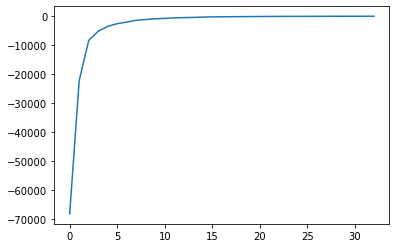

In [109]:
plt.plot(scr)

## Ubah variabel yang sebelumnya berbentuk *dataframe* menjadi sebuah *array*

In [110]:
x_array = np.array(X)
print(x_array)

[[ 28.1  30.5  33.2  36.2  39.5  43.2]
 [ 49.2  52.6  56.3  60.1  64.1  68.1]
 [ 38.7  44.2  49.6  54.6  59.4  63.8]
 [ 39.2  39.6  40.1  40.7  41.2  41.8]
 [ 30.7  32.   33.3  34.8  36.5  38.2]
 [ 35.8  36.5  37.3  38.2  39.1  40.1]
 [ 31.   31.7  32.6  33.5  34.5  35.6]
 [ 25.7  28.3  31.3  34.6  38.3  42.4]
 [ 49.2  52.5  56.   59.7  63.5  67.4]
 [ 82.8  83.   83.3  83.8  84.5  85.3]
 [100.  100.  100.  100.  100.  100. ]
 [ 65.7  72.9  78.7  83.1  86.6  89.3]
 [ 45.7  48.4  51.3  54.3  57.5  60.8]
 [ 66.4  70.5  74.6  78.   81.3  84.1]
 [ 47.6  51.1  54.7  58.6  62.6  66.7]
 [ 67.   67.7  69.9  73.7  78.8  84.9]
 [ 60.2  65.5  70.2  74.3  77.8  81.2]
 [ 41.7  45.4  49.4  53.6  58.1  62.7]
 [ 19.3  21.6  24.3  27.3  30.7  34.6]
 [ 30.2  33.1  36.2  39.8  43.7  47.9]
 [ 33.5  36.6  40.2  44.1  48.3  52.9]
 [ 42.1  45.1  48.4  52.   55.8  59.8]
 [ 63.2  66.   68.9  71.8  74.8  77.7]
 [ 45.2  49.8  54.7  59.2  63.9  68.7]
 [ 24.3  27.2  30.5  34.2  38.4  43.1]
 [ 36.7  40.6  45.   49.8

# Lakukan scaling data dari array

In [111]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.10904585, 0.11352041, 0.13246753, 0.17142857, 0.21326398,
        0.26137841],
       [0.37050805, 0.39540816, 0.43246753, 0.48181818, 0.53315995,
        0.58517555],
       [0.24039653, 0.28826531, 0.34545455, 0.41038961, 0.47204161,
        0.52925878],
       [0.24659232, 0.22959184, 0.22207792, 0.22987013, 0.23537061,
        0.24317295],
       [0.14126394, 0.13265306, 0.13376623, 0.15324675, 0.17425228,
        0.19635891],
       [0.20446097, 0.19005102, 0.18571429, 0.1974026 , 0.20806242,
        0.22106632],
       [0.14498141, 0.12882653, 0.12467532, 0.13636364, 0.14824447,
        0.16254876],
       [0.07930607, 0.08545918, 0.10779221, 0.15064935, 0.1976593 ,
        0.25097529],
       [0.37050805, 0.39413265, 0.42857143, 0.47662338, 0.52535761,
        0.57607282],
       [0.78686493, 0.78316327, 0.78311688, 0.78961039, 0.79843953,
        0.80884265],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.57496902, 0

# Tentukan jumlah cluster-nya, misalnya di sini ada 5 cluster
# Gunakan fungsi library K-Means pada Python

In [112]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

# Cari nilai pusat/centroid dari masing masing cluster

In [113]:
print(kmeans.cluster_centers_)

[[ 30.68461538  32.72307692  34.97692308  37.49230769  40.20769231
   43.19230769]
 [ 67.55        70.93333333  74.26666667  77.45        80.63333333
   83.75      ]
 [ 43.62727273  47.45454545  51.46363636  55.52727273  59.7
   63.87272727]
 [100.         100.         100.         100.         100.
  100.        ]
 [ 23.1         24.1         25.26666667  26.5         27.9
   29.43333333]]


# Tampilkan hasil *clustering* dan tambahkan kolom *clustering* ke dalam *dataframe*

In [114]:
print(kmeans.labels_)
    
# Menambahkan kolom "cluster" dalam dataframe
X["cluster"] = kmeans.labels_
X.head()

[0 2 2 0 0 0 0 0 2 1 3 1 2 1 2 1 1 2 4 0 0 2 1 2 0 2 0 2 4 0 4 0 0 2]


,2010,2015,2020,2025,2030,2035,cluster
1,28.1,30.5,33.2,36.2,39.5,43.2,0
2,49.2,52.6,56.3,60.1,64.1,68.1,2
3,38.7,44.2,49.6,54.6,59.4,63.8,2
4,39.2,39.6,40.1,40.7,41.2,41.8,0
5,30.7,32.0,33.3,34.8,36.5,38.2,0


# Coba lakukan visualisasi pembagian hasil *cluster*

(array([13.,  0.,  6.,  0.,  0., 11.,  0.,  1.,  0.,  3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

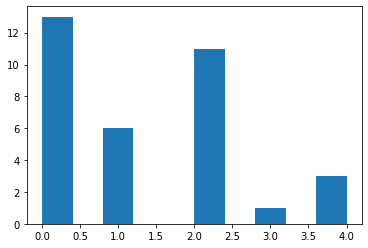

In [115]:
plt.hist(X["cluster"])

# Lakukan visualisasi pengelompokan *cluster*. Untuk melakukannya, bisa digunakan fungsi *seaborn* pada Python dan maka hasilnya akan seperti di bawah ini.

<Figure size 432x288 with 0 Axes>

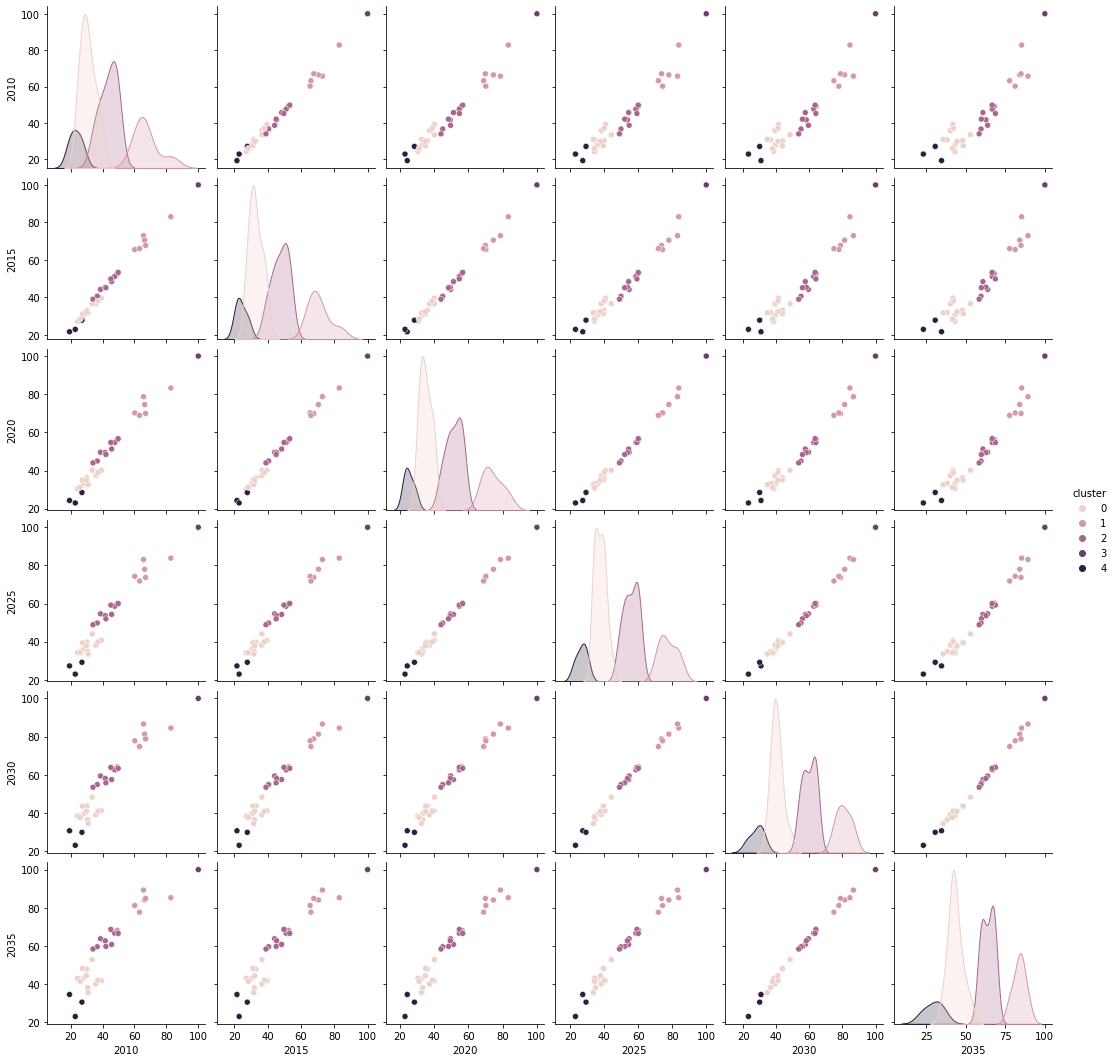

In [116]:
plt.figure()
sns.pairplot(X, hue="cluster", dropna=True)
plt.show()

# Dari gambar di atas, maka dapat kita lihat bahwa dari data Persentase Penduduk Daerah Perkotaan menurut Provinsi, 2010-2035 telah dicluster menjadi 5